In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

from cycler import cycler
from matplotlib import rcParams

rcParams['text.usetex'] = False
rcParams['font.family'] = 'serif'
rcParams['axes.prop_cycle'] = cycler('color', (
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
)) # d3.js color cycle


# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

COLORS = {'blue': '#1f77b4',
          'orange': '#ff7f0e', 'red':tableau20[6]}


import pandas as pd
import numpy as np
fpp_all = pd.read_csv('fpp_final_table.csv', index_col=0)

try:
    kepnum = pd.read_table('kepler_numbers.txt', delimiter='\s*\|\s*', comment='#', names=['kepnum',''])

    fpp_all.ix[kepnum.index, 'kepnum'] = kepnum.kepnum
except IOError:
    print("Kepler numbers not available.")
    
fpp_all.count()

Kepler numbers not available.


/Users/tdm/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


koi.1                    8054
rprs                     7968
secthresh                7968
maxrad                   7968
lhood_heb                7877
pr_heb                   7877
lhood_heb_Px2            7877
pr_heb_Px2               7877
lhood_eb                 7877
pr_eb                    7877
lhood_eb_Px2             7877
pr_eb_Px2                7877
lhood_beb                7877
pr_beb                   7877
lhood_beb_Px2            7877
pr_beb_Px2               7877
lhood_boxy               7877
pr_boxy                  7877
lhood_long               7877
pr_long                  7877
lhood_pl                 7877
pr_pl                    7877
lhood_tot                7877
fp                       7877
FPP                      7877
kepid                    7102
period                   7102
rp                       7965
disposition              7102
prob_ontarget            7577
pos_prob_score           8054
not_transitlike          8054
significant_secondary    8054
centroid_o

In [2]:
broke = ~(fpp_all.exception.isnull())

In [5]:
fpp_all[broke].query('FPP > 0 and disposition=="CANDIDATE"')[['FPP','exception']]

,FPP,exception
koi,,


In [11]:
len(fpp_all.query('pr_long > 0.5 and disposition=="FALSE POSITIVE"'))

582

In [12]:
len(fpp_all.query('pr_boxy > 0.9'))

45

In [13]:
fpp_all.pr_long / fpp_all.lhood_long

koi
K00001.01           NaN
K00002.01           NaN
K00003.01           NaN
K00004.01           NaN
K00005.01           NaN
K00006.01           NaN
K00007.01           NaN
K00008.01           NaN
K00009.01           NaN
K00010.01           NaN
K00011.01      0.589651
K00012.01           NaN
K00013.01           NaN
K00014.01           NaN
K00015.01           NaN
K00016.01           NaN
K00017.01           NaN
K00018.01           NaN
K00019.01           NaN
K00020.01      0.027037
K00021.01           NaN
K00022.01           NaN
K00023.01           NaN
K00024.01           NaN
K00025.01           NaN
K00026.01           NaN
K00027.01      2.801932
K00028.01           NaN
K00031.01           NaN
K00033.01      0.015278
                ...    
K08262.01           NaN
K08263.01      9.210526
K08264.01           NaN
K08265.01      9.668874
K08267.01           NaN
K08269.01      0.677778
K08272.01           NaN
K08273.01      1.617284
K08274.01           NaN
K08275.01           NaN
K08276.01   

In [14]:
fpp_mean.columns

Index([u'koi', u'FPP', u'L_beb', u'L_beb_Px2', u'L_boxy', u'L_eb', u'L_eb_Px2',
       u'L_heb', u'L_heb_Px2', u'L_long', u'L_pl', u'fp', u'fpV', u'lhood_beb',
       u'lhood_beb_Px2', u'lhood_boxy', u'lhood_eb', u'lhood_eb_Px2',
       u'lhood_heb', u'lhood_heb_Px2', u'lhood_long', u'lhood_pl', u'pr_beb',
       u'pr_beb_Px2', u'pr_boxy', u'pr_eb', u'pr_eb_Px2', u'pr_heb',
       u'pr_heb_Px2', u'pr_long', u'pr_pl'],
      dtype='object')

In [17]:
(fpp_mean.pr_beb + fpp_mean.pr_beb_Px2 + fpp_mean.pr_boxy + fpp_mean.pr_eb + fpp_mean.pr_eb_Px2 +\
    fpp_mean.pr_heb + fpp_mean.pr_heb_Px2 + fpp_mean.pr_long + fpp_mean.pr_pl).min()

0.999475

In [90]:
fpp_mean = pd.read_csv('data/fpp_bootstrap_mean.csv')
fpp_mean.rename(columns={'Unnamed: 0':'koi'}, inplace=True)
fpp_mean.index = fpp_mean['koi']

fpp_max = pd.read_csv('data/fpp_bootstrap_max.csv')
fpp_max.rename(columns={'Unnamed: 0':'koi'}, inplace=True)
fpp_max.index = fpp_max['koi']

In [75]:
fpp_all.ix['K00191.03']

koi.1                      K00191.03
rprs                           0.013
secthresh                         36
maxrad                          2.67
lhood_heb                   3.62e-45
pr_heb                      1.37e-41
lhood_heb_Px2                  1e-15
pr_heb_Px2                  4.17e-13
lhood_eb                    1.58e-54
pr_eb                       1.37e-50
lhood_eb_Px2                 5.7e-26
pr_eb_Px2                   1.67e-22
lhood_beb                   1.38e-25
pr_beb                      7.99e-21
lhood_beb_Px2               1.28e-08
pr_beb_Px2                  0.000751
lhood_boxy                         0
pr_boxy                            0
lhood_long                   0.00809
pr_long                        0.999
lhood_pl                 0.008089987
pr_pl                       2.17e-15
lhood_tot                    0.00809
fp                              0.12
FPP                                1
kepid                        5972334
period                       0.70862
r

In [74]:
fpp_all.lhood_tot.describe()

count    7.046000e+03
mean     1.337230e+03
std      1.880900e+04
min      3.906000e-30
25%      1.163000e-01
50%      1.032000e+00
75%      5.347000e+00
max      8.397000e+05
Name: lhood_tot, dtype: float64

In [2]:
fpp_all.query('0.01 < rprs < 0.1 and disposition=="CANDIDATE" and L_tot > 1e-3').sort('pr_eb_Px2', ascending=False)[['rprs','period','L_tot','pr_eb_Px2']].head(10)

/u/tdm/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,rprs,period,L_tot,pr_eb_Px2
koi,,,,
K05157.01,0.018,0.782046,0.940000,1.000
K03156.01,0.029,0.761122,48.090000,0.830
K02725.01,0.083,0.587471,0.003803,0.800
K00684.01,0.039,4.034915,4.673000,0.719
K02050.02,0.018,3.177999,11.750000,0.379
K00554.01,0.073,3.658494,0.510200,0.368
K03813.01,0.055,4.859199,1.807000,0.339
K00103.01,0.027,14.910942,0.470600,0.307
K04193.01,0.036,94.176898,0.191500,0.282


In [82]:
# This is the Gaidos et al "enigmatic" candidate.
fpp_all.ix['K06705.01']

koi.1                        K06705.01
rprs                             0.034
secthresh                           30
maxrad                             3.6
lhood_heb                            0
pr_heb                               0
lhood_heb_Px2                9.43e-128
pr_heb_Px2                   1.39e-125
lhood_eb                             0
pr_eb                                0
lhood_eb_Px2              3.576577e-79
pr_eb_Px2                 2.902873e-76
lhood_beb                1.235539e-148
pr_beb                   2.358761e-144
lhood_beb_Px2               1.5131e-25
pr_beb_Px2                  3.5913e-21
lhood_boxy                           0
pr_boxy                              0
lhood_long                     0.00801
pr_long                              1
lhood_pl                 5.990008e-181
pr_pl                    3.854005e-176
lhood_tot                      0.00801
fp                                0.17
FPP                                  1
kepid                    

In [19]:
fpp_all[fpp_all.FPP.isnull()].groupby('exception').count()

,koi.1,rprs,secthresh,maxrad,lhood_heb,pr_heb,lhood_heb_Px2,pr_heb_Px2,lhood_eb,pr_eb,...,disposition,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match,MES,has_ttv,n_cands
exception,,,,,,,,,,,,,,,,,,,,,
2017-07-26,13,13,13,13,0,0,0,0,0,0,...,13,11,13,13,13,13,13,13,13,13
AllWithinRocheError,50,50,50,50,0,0,0,0,0,0,...,40,41,50,50,50,50,50,40,50,40
AssertionError,1,1,1,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
BadRoweFitError,80,0,0,0,0,0,0,0,0,0,...,78,67,80,80,80,80,80,78,0,78
MCMCError,16,16,16,16,0,0,0,0,0,0,...,12,12,16,16,16,16,16,12,16,12
NoFitError,4,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,0,4
NoWeakSecondaryError,2,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Unable,2,2,2,2,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
ValueError,9,9,9,9,0,0,0,0,0,0,...,8,6,9,9,9,9,9,8,9,8


In [93]:
other = ['2015-08-13', 'KeyError', 'TypeError', 'ValueError', 'ZeroDivisionError','IOError']
fpp_all.query("exception in ['2015-08-13', 'KeyError', 'TypeError', 'ValueError', 'ZeroDivisionError','IOError']")['disposition']

koi
K00371.02    FALSE POSITIVE
K02433.06         CANDIDATE
K03528.01         CANDIDATE
Name: disposition, dtype: object

In [94]:
fpp_all.query("exception in ['EmptyPhotometryError','BadPhotometryError']").groupby('disposition').count()

,koi.1,rprs,secthresh,maxrad,pr_heb,pr_heb_Px2,pr_eb,pr_eb_Px2,pr_beb,pr_beb_Px2,...,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match,MES,exception,has_ttv,n_cands
disposition,,,,,,,,,,,,,,,,,,,,,
CANDIDATE,13,3,3,3,0,0,0,0,0,0,...,12,13,13,13,13,13,13,13,3,13
FALSE POSITIVE,13,0,0,0,0,0,0,0,0,0,...,12,13,13,13,13,13,13,13,0,13


In [5]:
np.savetxt('empty_photometry.txt',fpp_all.query('exception == "EmptyPhotometryError"')['koi.1'], fmt='%s')
np.savetxt('missing_koi.txt',fpp_all.query('exception == "MissingKOIError"')['koi.1'], fmt='%s')


In [7]:
runtime_errors = ["ZeroDivisionError", "ValueError", "MCMCError", "EmptyPopulationError", "AllWithinRocheError"]
len(fpp_all.query('FPP >=0 or exception in ["ZeroDivisionError", "ValueError", "MCMCError", "EmptyPopulationError", "AllWithinRocheError"]'))

7062

In [95]:
fpp_all.query('L_tot < 1e-2 and L_tot > 1e-3 and FPP < 0.01 and disposition == "CANDIDATE" ' +\
              'and prob_ontarget > 0.9 and pos_prob_score > 0.3 and MES >= 10')

,koi.1,rprs,secthresh,maxrad,pr_heb,pr_heb_Px2,pr_eb,pr_eb_Px2,pr_beb,pr_beb_Px2,...,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match,MES,exception,has_ttv,n_cands
koi,,,,,,,,,,,,,,,,,,,,,
K00289.01,K00289.01,0.020,31,0.51,1.610000e-38,5.440000e-15,1.020000e-13,4.880000e-04,3.540000e-60,1.020000e-44,...,1.00,1.00,False,False,False,False,76.267290,NaN,False,2
K01175.02,K01175.02,0.010,41,4.20,1.460000e-196,3.150000e-28,4.050000e-81,6.510000e-43,1.030000e-78,6.200000e-77,...,1.00,0.50,False,False,False,False,13.743307,NaN,False,2
K01316.01,K01316.01,0.008,12,0.69,1.440000e-43,3.400000e-09,1.030000e-53,7.380000e-32,1.060000e-268,9.240000e-216,...,1.00,1.00,False,False,False,False,20.358790,NaN,False,1
K02009.01,K02009.01,0.022,92,1.02,2.170000e-35,1.790000e-35,1.200000e-16,8.170000e-21,2.720000e-80,8.770000e-72,...,1.00,0.99,False,False,False,False,30.132612,NaN,False,1
K02914.01,K02914.01,0.009,49,1.20,2.140000e-80,1.950000e-52,4.280000e-62,9.970000e-45,1.910000e-313,7.600000e-268,...,0.99,0.78,False,False,False,False,14.865933,NaN,False,1


In [4]:
df = fpp_all.query('exception == "MissingKOIError" or exception == "EmptyPhotometryError"')
df.groupby('disposition').count()

,koi.1,rprs,secthresh,maxrad,pr_heb,pr_eb,pr_beb,L_tot,fp,FPP,kepid,period,rp,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match,exception
disposition,,,,,,,,,,,,,,,,,,,,
CANDIDATE,13,0,0,0,0,0,0,0,0,0,13,13,0,9,11,13,13,13,13,13
FALSE POSITIVE,34,0,0,0,0,0,0,0,0,0,34,34,0,14,15,34,34,34,34,34


In [96]:
#4115.01 -- variable star?  rprs too big

fpp_all.ix['K07016.01']

koi.1                    K07016.01
rprs                         0.013
secthresh                      120
maxrad                        1.26
pr_heb                    1.24e-07
pr_heb_Px2                3.32e-08
pr_eb                      0.00018
pr_eb_Px2                 1.68e-06
pr_beb                     0.00115
pr_beb_Px2                8.92e-05
L_tot                        1.632
fp                           0.162
FPP                        0.00142
kepid                      8311864
period                     384.843
rp                         1.50265
disposition              CONFIRMED
prob_ontarget                 0.98
pos_prob_score                0.94
not_transitlike              False
significant_secondary        False
centroid_offset              False
ephem_match                  False
MES                         9.6949
exception                      NaN
has_ttv                      False
n_cands                          1
Name: K07016.01, dtype: object

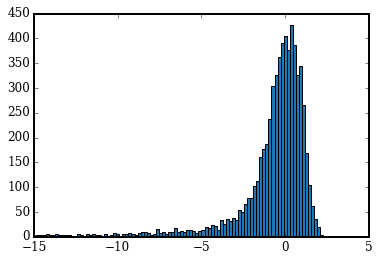

In [52]:
ok = fpp_all['lhood_tot'] > 0
#plt.hist(np.log10(fpp_all[ok]['lhood_long']), bins=np.linspace(-2.3,-1.9,100));
#plt.figure()
plt.hist(np.log10(fpp_all[ok]['lhood_pl']), bins=np.linspace(-15,3,100));


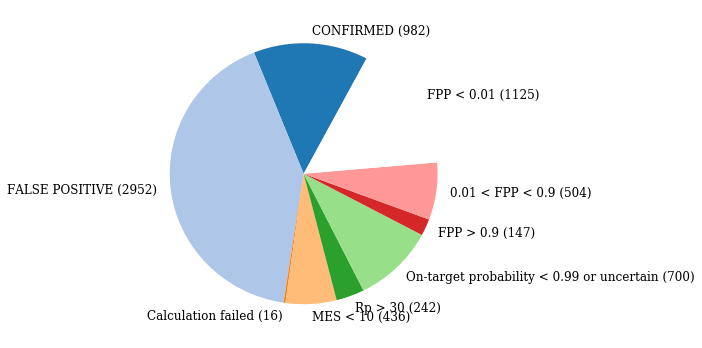

In [20]:
prob_score_thresh = 0.3
min_period = 0
fpp_thresh = 0.01 - 0.0006
lhood_thresh = -np.inf

max_rp = 30

fpp_col = 'FPP'

confirmed = fpp_all['disposition'] == 'CONFIRMED'
known_fp = fpp_all['disposition'] == 'FALSE POSITIVE'
candidate = fpp_all['disposition'] == 'CANDIDATE'
low_fpp = fpp_all[fpp_col] < fpp_thresh
hi_fpp = fpp_all[fpp_col] > 0.9
med_fpp = (fpp_all[fpp_col] >= fpp_thresh) & (fpp_all[fpp_col] <=0.9)
snr_low = fpp_all['MES'] < 10
snr_good = fpp_all['MES'] >= 10
on_target = (fpp_all['prob_ontarget'] >= 0.99) & (fpp_all['pos_prob_score'] >= prob_score_thresh)
off_target = (fpp_all['prob_ontarget'] < 0.99) & (fpp_all['pos_prob_score'] >= prob_score_thresh)
target_ambiguous = ((fpp_all['pos_prob_score'] < prob_score_thresh) | 
                    np.isnan(fpp_all['pos_prob_score']) | 
                    np.isnan(fpp_all['prob_ontarget']))
not_crazy = fpp_all['lhood_tot'] > lhood_thresh
crazy = fpp_all['lhood_tot'] <= lhood_thresh
too_big = fpp_all['rp'] > max_rp
rp_ok = ~too_big
short_period = fpp_all['period'] < min_period
period_ok = fpp_all['period'] >= min_period


fpp_calculated = np.isfinite(fpp_all[fpp_col]) 
d = fpp_all[fpp_calculated]

#reliable = (confirmed | candidate) & on_target & not_crazy
#print(sum(reliable))
#print(sum(reliable & low_fpp))
#print(sum(candidate & on_target & not_crazy & low_fpp))
#print(sum(confirmed))
#print(sum(candidate & high_fpp))
#print(sum(confirmed & high_fpp))

newfp = (candidate & fpp_calculated & not_crazy & on_target & hi_fpp & snr_good & period_ok & rp_ok)
newmed = (candidate & fpp_calculated & not_crazy & on_target & med_fpp & snr_good & period_ok & rp_ok)
newval = (candidate & fpp_calculated & not_crazy & on_target & low_fpp & snr_good & period_ok & rp_ok)

categories = [ confirmed, known_fp, 
              ((candidate & ~fpp_calculated & snr_good & rp_ok) | 
               (candidate & fpp_calculated & crazy & snr_good & rp_ok)),
              (candidate & snr_low),
              (candidate & too_big),
              ((candidate & fpp_calculated & not_crazy & target_ambiguous & snr_good & rp_ok) | 
               (candidate & fpp_calculated & not_crazy & off_target & snr_good & rp_ok)),
              newfp, newmed, newval]

labels = ['CONFIRMED ({})'.format(categories[0].sum()),
          'FALSE POSITIVE ({})'.format(categories[1].sum()),
          'Calculation failed ({})'.format(categories[2].sum()),
          'MES < 10 ({})'.format(categories[3].sum()),
          'Rp > 30 ({})'.format(categories[4].sum()),
          'On-target probability < 0.99 or uncertain ({})'.format(categories[5].sum()),
          #'On-target probability < 0.99 ({})'.format(categories[5].sum()), 
          'FPP > 0.9 ({})'.format(categories[6].sum()), 
          '0.01 < FPP < 0.9 ({})'.format(categories[7].sum()), 
          'FPP < 0.01 ({})'.format(categories[8].sum())]

#needmore = categories[3] | categories[4] | categories[5] 

sums = np.array([c.sum() for c in categories])
fracs = sums / float(sums.sum()) * 100

colors = tableau20[:9]
colors[-1] = 'w'

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.pie(fracs, labels=labels, startangle=62, 
       colors=colors);

plt.savefig('document/figures/fpp_pie.pdf', bbox_inches='tight')
fpp_all[newval].to_csv('newly_validated.csv')

In [21]:
((confirmed | candidate ) & fpp_calculated & not_crazy & on_target & low_fpp & snr_good & period_ok & rp_ok).sum()

1758

In [22]:
len(fpp_all.query('FPP>0.9 and disposition=="CANDIDATE"'))

418

In [24]:
fpp_all[newval].query('rp > 10')[['rprs','rp','period','FPP']]


,rprs,rp,period,FPP
koi,,,,
K00125.01,0.138,13.152214,38.478757,5.630000e-05
K00129.01,0.076,13.616313,24.669196,4.790000e-06
K00131.01,0.074,10.909799,5.014235,2.430000e-06
K00186.01,0.117,11.852499,3.243260,3.330000e-06
K00189.01,0.132,10.421275,30.360447,2.240000e-04
K00191.01,0.112,10.674261,15.358768,3.100000e-04
K00421.01,0.118,12.314089,4.454194,2.390000e-03
K00433.02,0.118,11.078820,328.239955,6.310000e-03
K00767.01,0.117,11.571816,2.816505,4.940000e-08


In [23]:
fpp_all.query('pr_boxy > 0.9 and MES>10 and disposition=="CANDIDATE"')

,koi.1,rprs,secthresh,maxrad,lhood_heb,pr_heb,lhood_heb_Px2,pr_heb_Px2,lhood_eb,pr_eb,...,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match,MES,exception,has_ttv,n_cands
koi,,,,,,,,,,,,,,,,,,,,,
K00564.01,K00564.01,0.020,80.0,0.75,0.0,0.0,0.000000e+00,0.000000e+00,2.060000e-77,1.860000e-73,...,1.000,0.67,False,False,False,False,32.585598,NaN,True,3.0
K00564.03,K00564.03,0.013,51.0,0.84,0.0,0.0,0.000000e+00,0.000000e+00,2.310000e-50,3.860000e-46,...,1.000,0.78,False,False,False,False,17.653257,NaN,True,3.0
K00691.01,K00691.01,0.024,37.0,0.50,0.0,0.0,0.000000e+00,0.000000e+00,1.100000e-28,1.280000e-24,...,1.000,1.00,False,False,False,False,75.258026,NaN,False,2.0
K00734.01,K00734.01,0.031,129.0,0.50,0.0,0.0,0.000000e+00,0.000000e+00,4.660000e-40,5.200000e-36,...,1.000,1.00,False,False,False,False,46.413704,NaN,True,2.0
K00869.04,K00869.04,0.020,87.0,0.63,0.0,0.0,3.310000e-187,6.000000e-184,1.470000e-17,2.120000e-12,...,1.000,0.99,False,False,False,False,19.421583,NaN,True,4.0
K01145.01,K01145.01,0.020,99.0,0.87,0.0,0.0,0.000000e+00,0.000000e+00,3.070000e-29,3.550000e-25,...,1.000,0.66,False,False,False,False,23.294914,NaN,True,1.0
K01316.01,K01316.01,0.008,11.0,0.72,0.0,0.0,2.720000e-257,9.340000e-256,9.040000e-60,3.060000e-55,...,1.000,1.00,False,False,False,False,20.358790,NaN,False,1.0
K01574.03,K01574.03,0.011,42.0,2.52,0.0,0.0,0.000000e+00,0.000000e+00,5.760000e-44,1.110000e-39,...,0.930,0.50,False,False,False,False,10.047633,NaN,True,4.0
K02075.01,K02075.01,0.010,9.0,0.72,0.0,0.0,0.000000e+00,0.000000e+00,3.640000e-64,8.560000e-60,...,1.000,1.00,False,False,False,False,33.674770,NaN,False,1.0


In [24]:
len(fpp_all.query('disposition=="CANDIDATE" and MES > 10 and prob_ontarget==True and pr_long > 0.9'))

41

In [80]:
fpp_long = fpp_all.query('pr_long > pr_boxy and pr_long > pr_heb and pr_long > pr_eb and pr_long > pr_beb and ' + 
                        'pr_long > pr_heb_Px2 and pr_long > pr_eb_Px2 and pr_long > pr_beb_Px2 and pr_long > pr_pl')

In [81]:
fpp_long.groupby('disposition').count()

,koi.1,rprs,secthresh,maxrad,lhood_heb,pr_heb,lhood_heb_Px2,pr_heb_Px2,lhood_eb,pr_eb,...,not_transitlike,significant_secondary,centroid_offset,ephem_match,MES,exception,has_ttv,n_cands,FPP_max,FPP_std
disposition,,,,,,,,,,,,,,,,,,,,,
CANDIDATE,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,2,81,86,86,86
CONFIRMED,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,0,3,3,3,3
FALSE POSITIVE,530,527,527,527,530,530,530,530,530,530,...,530,530,530,530,530,4,523,530,530,530


In [76]:
print fpp_long.significant_secondary.sum()
print fpp_long.centroid_offset.sum()
print fpp_long.ephem_match.sum()
print fpp_long.not_transitlike.sum()

248
247
312
136


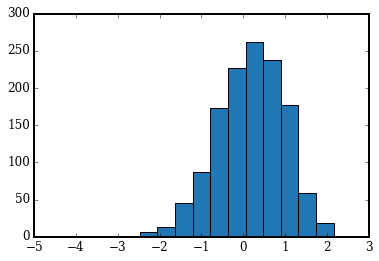

In [25]:
m = (candidate & fpp_calculated & on_target & low_fpp & snr_good & period_ok)
plt.hist(np.log10(fpp_all[m]['lhood_tot']), bins=np.linspace(-5,3,20));

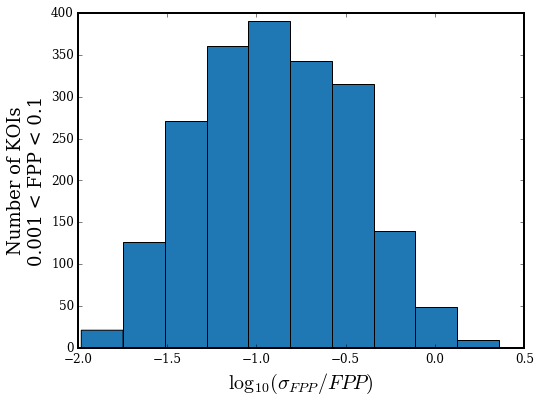

In [196]:
ok = (0.001 < fpp_all.FPP) & (fpp_all.FPP < 0.1)
#ok = newval & (fpp_all.FPP > 0)
err = (fpp_all.FPP_std[ok]/fpp_all.FPP[ok])
plt.figure(figsize=(8,6))
plt.hist(np.log10(err.values));
plt.xlabel('$\log_{10}(\sigma_{FPP} / FPP)$', size=20);
plt.ylabel('Number of KOIs\n0.001 < FPP < 0.1', size=18)
plt.savefig('document/figures/sigmafpp.pdf')

In [197]:
err.describe()

count    2025.000000
mean        0.201274
std         0.226246
min         0.010451
25%         0.060255
50%         0.123071
75%         0.266419
max         2.278320
dtype: float64

In [14]:
sum((candidate | confirmed) & on_target & not_crazy & snr_good)

2838

In [15]:
sum(hi_fpp)

2006

In [16]:
sum(candidate & hi_fpp)

368

In [17]:
sum(low_fpp)

2827

In [18]:
len(fpp_all[target_ambiguous].query('MES > 10 and period > 3 and FPP < 0.01'))

184

In [19]:
len(fpp_all[newval].query('MES > 10 and period > 3'))

1065

In [263]:
fpp_all.iloc[3050]['kepnum']

nan

In [6]:
#%%file write_fpptable_tex.py
#!/usr/bin/env python

import pandas as pd
import numpy as np
import re

validated = ((candidate | confirmed) & fpp_calculated & not_crazy & 
             on_target & low_fpp & snr_good & period_ok)

def write_fpptable_tex(nrows=25, istart=3000, filename='document/table_fpp.tex'):
    fpp_all = pd.read_csv('fpp_final_table.csv', index_col=0)
    kepnum = pd.read_table('kepler_numbers.txt', delimiter='\s*\|\s*', comment='#', names=['kepnum',''])

    fpp_all.ix[kepnum.index, 'kepnum'] = kepnum.kepnum
    
    columns = ['koi.1', 'period', 'has_ttv', 'rp', 'MES', 'secthresh',
              'maxrad', 
              'pr_eb', 'pr_eb_Px2', 'pr_heb', 'pr_heb_Px2', 
              'pr_beb', 'pr_beb_Px2', 'pr_boxy', 'pr_long', 
              'fp', 
              'prob_ontarget','pos_prob_score', 
               'disposition', 'FPP','FPP_std',
              'exception', 'kepnum']

    # Failure classes:
    #  1:  No MCMC modeling from JRowe (MissingKOIError, EmptyPhotometryError)
    #  2:  Bad MCMC model from JRowe (BadRoweFitError)
    #  3:  No stellar params from Huber table (MissingStellarError)
    #  4:  No weak secondary data (NoWeakSecondaryError)
    #  5:  MCMC trapezoid fit did not converge (MCMCError)
    #  6:  Period too short for implied star (AllWithinRocheError)
    #  7:  Other (EmptyPopulationError, ValueError, ZeroDivisionError, [anything else])
    exceptions = {'AllWithinRocheError': 6,
                 'BadRoweFitError': 2,
                 'EmptyPhotometryError': 1,
                 'EmptyPopulationError': 7,
                 'MCMCError': 5,
                  'IOError':1,
                 'MissingKOIError': 1,
                 'MissingStellarError': 3,
                 'NoWeakSecondaryError': 4,
                 'ValueError': 7,
                 'ZeroDivisionError': 7}
    
    formats = {'koi.1':'{:9s}',
                'disposition':'{:s}',
                'period':'{:.3f}',
                'rp':'{:.2f}',
                'MES':'{:.1f}',
                'secthresh':'{:.0f}',
                'maxrad':'{:.2f}',
                'pr_heb':'{:.2g}',
                'pr_eb':'{:.2g}',
                'pr_beb':'{:.2g}',
                'pr_heb_Px2':'{:.2g}',
                'pr_eb_Px2':'{:.2g}',
                'pr_beb_Px2':'{:.2g}',
                'pr_boxy':'{:.2g}',
               'pr_long':'{:.2g}',
               'fp':'{:.3f}',
                 'FPP':'{:.2g}',
                 'FPP_std':'{:.2g}',
             'kepid':'{:.0f}',
             'prob_ontarget':'{:.2f}',
             'pos_prob_score':'{:.2f}',
             'exception':'{}',
             'has_ttv':'{}', 
               'kepnum':'{}'
               }

    
    fout = open(filename,'w')
    fout.write("""
\\begin{deluxetable*}{ccccccccccccccccccccccc}
\\tablewidth{0pt}
\\tabletypesize{\scriptsize}
\\tablecaption{False Positive Probability Results
\\tablabel{fpp}}
\\tablehead{\\colhead{KOI} &
    \\colhead{$P$} &
    \\colhead{TTV?} &
    \\colhead{$R_p$} &
    \\colhead{SNR} &
    \\colhead{$\\delta_{\\rm sec}$\\tablenotemark{a}} &
    \\colhead{$r_{\\rm excl}$\\tablenotemark{b}} &
    \\colhead{Pr$_{\\rm EB}$\\tablenotemark{c}} &
    \\colhead{Pr$_{\\rm EB2}$\\tablenotemark{c}} &
    \\colhead{Pr$_{\\rm HEB}$\\tablenotemark{c}} &
    \\colhead{Pr$_{\\rm HEB2}$\\tablenotemark{c}} &
    \\colhead{Pr$_{\\rm BEB}$\\tablenotemark{c}} &
    \\colhead{Pr$_{\\rm BEB2}$\\tablenotemark{c}} &
    \\colhead{Pr$_{\\rm boxy}$\\tablenotemark{d}} &
    \\colhead{Pr$_{\\rm long}$\\tablenotemark{d}} &
    \\colhead{$f_p$\\tablenotemark{e}} &
    \\colhead{$p_{\\rm pos}$\\tablenotemark{f}} &
    \\colhead{$s_{\\rm pos}$\\tablenotemark{g}} &
    \\colhead{Disp.\\tablenotemark{h}} &
    \\colhead{FPP\\tablenotemark{i}} &
    \\colhead{$\\sigma_{\\rm FPP}$\\tablenotemark{j}} &
    \\colhead{Failure\\tablenotemark{k}} &
    \\colhead{Kep\\tablenotemark{l}} \\\\
    \\colhead{} &
    \\colhead{(d)} &
    \\colhead{} &
    \\colhead{($R_\\oplus$)} &
    \\colhead{} &
    \\colhead{(ppm)} &
    \\colhead{(\\arcsec)} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{} &
    \\colhead{}
    }
\\startdata
"""
        )
    for i in range(istart, istart+nrows):
        line = ''
        for c in columns:
            if c=='validated':
                val = 'Y' if validated[i] else 'N'
            elif c=='kepnum':
                val = fpp_all.iloc[i]['kepnum']
                m = re.search('Kepler-(\d+) (\w)', str(val))
                if m:
                    val = '{}{}'.format(m.group(1),m.group(2))
                else:
                    val = '--'
            else:
                val = fpp_all.iloc[i][c]
            
            try:
                if np.isnan(val):
                    val = '--'
            except:
                pass
                
            if c=='exception':
                if val != '--':
                    try:
                        val = exceptions[val]
                    except KeyError:
                        val = 7
                
            elif c=='disposition':
                if val=='CANDIDATE':
                    val = 'CA'
                elif val=='FALSE POSITIVE':
                    val = 'FP'
                elif val=='CONFIRMED':
                    val = 'PL'
            elif c=='has_ttv':
                if val:
                    val='Y'
                else:
                    val='N'
            
            try:
                if c not in ['Ltot', 'has_ttv']:
                    if val < 1e-6:
                        val = 0.
            except:
                pass

            try:
                line += '{} & '.format(formats[c]).format(val)
            except ValueError:
                line += '{} & '.format(val)
                
                
        line = line[:-2]
        if i != istart+nrows-1:
            line += '\\\\ '
        line += '\n'
        fout.write(line)
    fout.write("""\\enddata
\\tablecomments{A portion of this table is shown for form and content.  
                The full table will be available online.}
\\tablenotetext{a}{Maximum secondary eclipse depth allowed.}
\\tablenotetext{b}{``Exclusion radius'' inside of which false positive scenarios are allowed.}
\\tablenotetext{c}{Probabilities for different astrophysical false positive scenarios: 
                unblended eclipsing binary (EB), hierarchical eclipsing binary (HEB),
                and background/foreground eclipsing binary (BEB). "2" indicates double-period scenario.}
\\tablenotetext{d}{Artificial models to identify signals that are poorly 
                described by any of the astrophysical scenarios.}
\\tablenotetext{e}{Assumed ``specific planet occurrence rate'' for this planet.}
\\tablenotetext{f}{Probability of signal to be on target star, according to Bryson et al.~(2015, in prep).}
\\tablenotetext{g}{Positional probability score, from Bryson et al. (2015).}
\\tablenotetext{h}{Exoplanet Archive disposition: false positive (FP), candidate (CA), or confirmed (PL).}
\\tablenotetext{i}{False positive probability; mean of 10 bootstrap recalculations.}
\\tablenotetext{j}{False positive probability uncertainty; standard deviation of 10 bootstrap recalculations.}
\\tablenotetext{k}{Reason for failure: (1) No MCMC modeling available from \\citet{Rowe:2015};
    (2)  Unphysical MCMC fit from \\citet{Rowe:2015};
    (3)  No stellar parameters available from \citet{Huber:2014};
    (4)  No weak secondary data available;
    (5)  MCMC trapezoid fit did not converge;
    (6)  Period too short for implied star (orbit within star);
    (7)  Other unspecified \\vespa\\ error.}
\\tablenotetext{l}{Kepler number assigned, if validated.}
\\end{deluxetable*}
"""            )
    fout.close()
    
if __name__=='__main__':
    write_fpptable_tex()
    write_fpptable_tex(len(fpp_all), 0, 'document/table_fpp_all.tex')

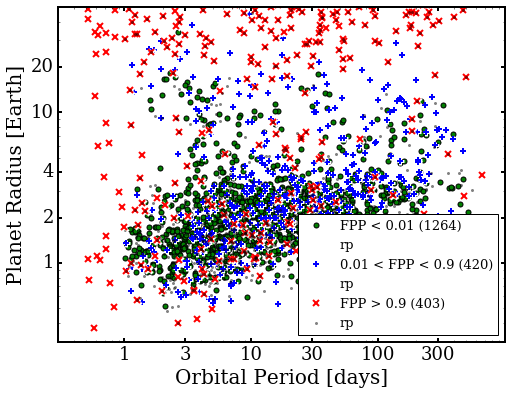

In [100]:
# This figure now defunct.  Not using anymore.

from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(1,1, figsize=(8,6))

fps = candidate & hi_fpp

ax.plot(fpp_all[newval]['period'], fpp_all[newval]['rp'], 'go', ms=5, mew=1, 
        label='FPP < 0.01 ({})'.format(np.sum(newval), mec='LawnGreen'))

ax.plot(fpp_all[newmed]['period'], fpp_all[newmed]['rp'], 'w+', ms=7, mew=3)
ax.plot(fpp_all[newmed]['period'], fpp_all[newmed]['rp'], 'b+', ms=6, mew=2,
       label='0.01 < FPP < 0.9 ({})'.format(np.sum(newmed)))

ax.plot(fpp_all[fps]['period'], fpp_all[fps]['rp'], 'wx', ms=7, mew=3)
ax.plot(fpp_all[fps]['period'], fpp_all[fps]['rp'], 'rx', ms=6, mew=2,
       label='FPP > 0.9 ({})'.format(np.sum(fps)))

ax.plot(fpp_all[needmore]['period'], fpp_all[needmore]['rp'], 'ko', ms=1, alpha=0.5)

ax.set_ylim(ymin=0.3, ymax=50)
ax.set_xlim(xmin=0.3, xmax=1000)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks([1,3,10,30,100,300])
ax.set_yticks([1,2,4,10,20])

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_ylabel('Planet Radius [Earth]', fontsize=20)
ax.set_xlabel('Orbital Period [days]', fontsize=20)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

ax.legend(loc='lower right', numpoints=1, fontsize=13)

plt.savefig('document/figures/RP_cand.pdf', bbox_inches='tight')

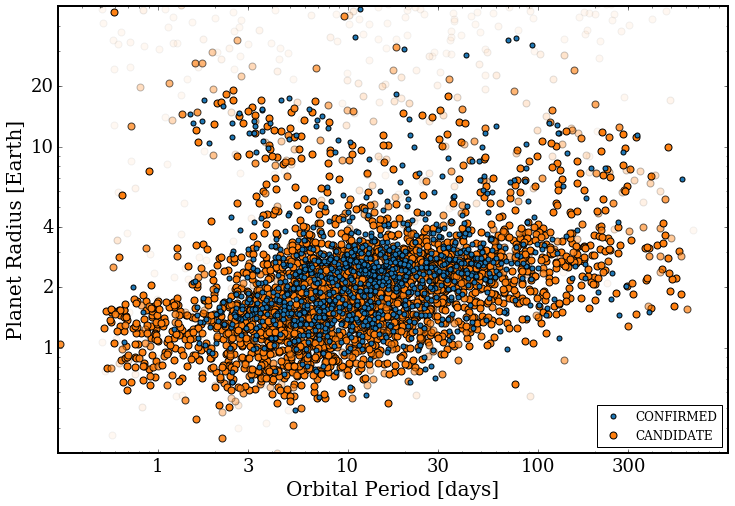

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.lines as mlines

fig, ax = plt.subplots(1,1, figsize=(12,8))

for _,s in fpp_all.iterrows():
    if s.disposition=='FALSE POSITIVE':
        continue
    elif s.disposition=='CONFIRMED':# and False:
        alpha = 1.
        col=COLORS['blue']
        z = 2
        size = 5
    else:
        if np.isnan(s.FPP):
            continue
        col = COLORS['orange']
        z = 1
        size = 7
        alpha = 0.95*(1 - s.FPP) + 0.05
        #alpha = 1
    if not np.isfinite(alpha):
        continue # don't break PDF
    #if s.MES < 10 or s.period < 1:
    #    col = 'r'
    ax.plot(s.period, s.rp, color=col, marker='o', ms=size, mew=1, alpha=alpha, zorder=z)

ax.set_ylim(ymin=0.3, ymax=50)
ax.set_xlim(xmin=0.3, xmax=1000)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks([1,3,10,30,100,300])
ax.set_yticks([1,2,4,10,20])

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_ylabel('Planet Radius [Earth]', fontsize=20)
ax.set_xlabel('Orbital Period [days]', fontsize=20)

ax.legend(handles=[mlines.Line2D([],[], color=COLORS['blue'], marker='o', ms=5, ls='none', mew=1),
                   mlines.Line2D([],[], color=COLORS['orange'], marker='o', ms=7, ls='none', mew=1)], 
                  labels=['CONFIRMED','CANDIDATE'], numpoints=1, loc='lower right')

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

#plt.savefig('document/figures/fppalpha_noconfirmed.pdf', bbox_inches='tight')
#plt.savefig('document/figures/fppalpha_noalpha.pdf', bbox_inches='tight')
plt.savefig('document/figures/fppalpha.pdf', bbox_inches='tight')

In [25]:
fpp_all.query('period < 1 and rp>4 and rp < 10 and disposition=="CANDIDATE" and FPP < 0.1')

,koi.1,rprs,secthresh,maxrad,lhood_heb,pr_heb,lhood_heb_Px2,pr_heb_Px2,lhood_eb,pr_eb,...,prob_ontarget,pos_prob_score,not_transitlike,significant_secondary,centroid_offset,ephem_match,MES,exception,has_ttv,n_cands
koi,,,,,,,,,,,,,,,,,,,,,


In [220]:
import numpy as np
import matplotlib.pyplot as plt

def fpp_summaryplot(data=fpp_calculated,fig=None,symbol='o',ms=1,color='k',
                    markrs=[1,1.5,2,2.5,3,4,10],nbins=15,alpha=0.5,
                    title=None,hlineval=0.01,labelpos=(0.8,0.08),
                    summarylabel=True,erasedata=None,titlefontsize=20,
                    titlexy=(0.25,0.85), 
                    subquery=None, subcolor='b', **kwargs):
    
    data = data.sort('rp')
    inds = np.arange(len(data))
    data.index = inds
    
    
    ypts = data['FPP'].clip(1e-4,1)
    xpts = np.arange(len(data))
    plt.semilogy(ypts,symbol,ms=ms,color=color,alpha=alpha,**kwargs)

    if subquery is not None:
        sub = data.query(subquery)
        suby = sub['FPP'].clip(1e-4, 1)
        subx = sub.index
    
    if erasedata is not None:
        plt.semilogy(ypts,symbol,ms=ms,color=color,alpha=alpha,**kwargs)
        if subquery is not None:
            plt.semilogy(subx, suby, ms=ms+1, color=subcolor,
                        mec=subcolor)
        
    plt.ylim(ymin=8e-5)
    xmax = inds.max()+1
    plt.xlim(xmax=xmax)
    plt.xticks([])

    ax = plt.gca()

    plt.axhline(hlineval,color='k',lw=2)

    for r in markrs:
        i = np.argmin(np.absolute(data['rp'][inds]-r))
        ax.axvline(i,color='k',lw=3,ls=':')
        ax.annotate(r'%.1f' % r,xy=(float(i)/xmax,-0.05),xycoords='axes fraction',ha='center',
                    annotation_clip=False,fontsize=14)
        

    if nbins is not None:
        N = len(ypts)
        binsize = N/nbins
        xbins = []
        ybins = []
        yerrs = []
        for i in range(nbins):
            xbins.append((xpts[i*binsize:(i+1)*binsize]).mean())
            ybins.append(np.median(ypts[i*binsize:(i+1)*binsize]))
            yerrs.append((ypts[i*binsize:(i+1)*binsize]).std())
        #plt.errorbar(xbins,ybins,yerr=yerrs,color=linecolor,fmt='o',ms=5)
        plt.plot(xbins,ybins,'wo',ms=15)
        plt.plot(xbins,ybins,'ko',ms=13)
        plt.plot(xbins,ybins,'o', color=COLORS['red'],ms=12)

    plt.xlabel('Planet Radius [$R_\oplus$]',labelpad=30, fontsize=20)
    plt.ylabel('False Positive Probability', fontsize=20)
    plt.ylim(ymax=1.1)
    
    if title is not None:
        plt.annotate(title,xy=titlexy,xycoords='axes fraction',
                     fontsize=titlefontsize,
                     bbox=dict(boxstyle='round',fc='w',lw=2),ha='center')

    if summarylabel:
        N = float(len(data))
        gt_50pct = (data['FPP'] > 0.5).sum()
        lt_1pct = (data['FPP'] < (0.01-0.0006)).sum()
        #lt_03pct = (data['FPP'] < 0.003).sum()
        plt.annotate('%i/%i FPP > 50%%\n%i/%i FPP < 1%%' % 
                     (gt_50pct,N,lt_1pct,N),xy=labelpos,xycoords='axes fraction',
                     fontsize=15,bbox=dict(boxstyle='round',fc='w',lw=2),ha='center')


In [119]:
len(fpp_all.query('FPP > 0.9 and disposition=="CANDIDATE"'))

428

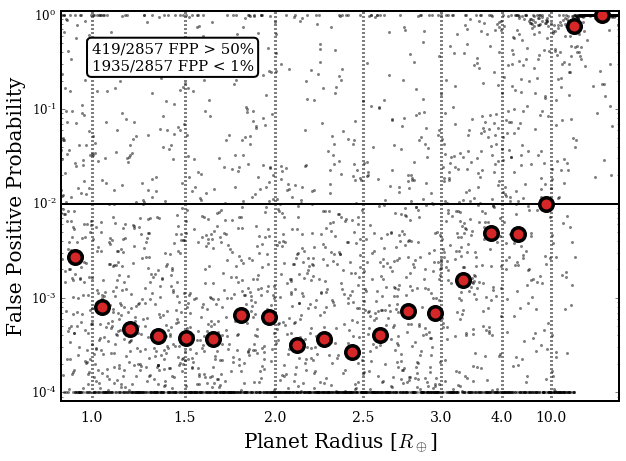

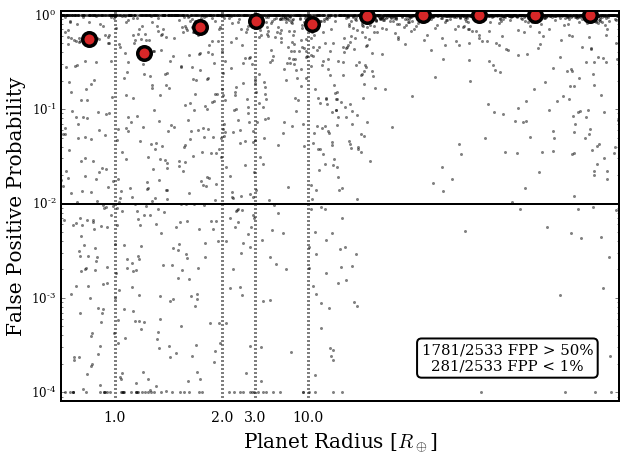

In [221]:
%matplotlib inline
plt.figure(figsize=(10,7))
d_reliable = d.query('disposition != "FALSE POSITIVE" and pos_prob_score > {} and prob_ontarget > 0.99 and MES > 10'.format(prob_score_thresh))
fpp_summaryplot(d_reliable,
               nbins=20, labelpos=(0.2,0.85));
plt.savefig('document/figures/fpp_summary_all.pdf')
plt.figure(figsize=(10,7))
fpp_summaryplot(d.query('(disposition == "FALSE POSITIVE") and MES>10'), 
               nbins=10, markrs=[1,2,3,10], subquery='prob_ontarget > 0.99');
plt.savefig('document/figures/fpp_summary_fp.pdf')

In [60]:
labels = ['all', 'singles','multis',
         '$R_p > 15\,R_\oplus$',
         '$10\,R_\oplus < R_p < 15\,R_\oplus$',
         '$4\,R_\oplus < R_p < 10\,R_\oplus$',
         '$2\,R_\oplus < R_p < 4\,R_\oplus$',
         '$R_p < 2\,R_\oplus$']
queries = ['rp>0','n_cands==1',
          'n_cands>1', 'rp >=15',
          'rp >= 10 and rp < 15',
          'rp >= 4 and rp < 10',
          'rp >= 2 and rp < 4',
          'rp < 2']

outfile = open('document/table_meanfpp.tex','w')
outfile.write(r'\begin{deluxetable}{cccc}' + '\n')
outfile.write(r'\tabletypesize{\scriptsize}' + '\n')
outfile.write(r'\tablecaption{Mean FPPs of candidate KOIs with reliable \vespa\ calculations' + '\n')
outfile.write(r'\tablabel{meanFPP} }' + '\n')
outfile.write(r'\tablehead{\colhead{Selection} & \colhead{Number} & \colhead{Mean FPP} } ' + '\n')
outfile.write(r'\startdata' + '\n')
for l,q in zip(labels, queries):
    d = d_reliable.query(q)
    outfile.write('{} & {} & {:.3f} '.format(l, len(d), d.FPP.mean()))#, d.FPP.median()))
    if l!=labels[-1]:
        outfile.write('\\\\\n')
    else:
        outfile.write('\n')
outfile.write(r'\enddata' + '\n')
outfile.write(r'\end{deluxetable}' + '\n')
outfile.close()
    #print('all & {} & {:.3f} \\\\'.format(len(d_reliable),d_reliable.FPP.mean()))
#print('singles & {} & {:.3f} \\\\'.format(len(d_reliable.query('n_cands==1')),
#                                          d_reliable.query('n_cands==1').FPP.mean()))
#print('multis & {} & {:.3f} \\\\'.format(len(d_reliable.query('n_cands>1')),
#                                         d_reliable.query('n_cands>1').FPP.mean()))
#print('$R_p > 10\,R_\oplus$ & {} & {:.3f} \\\\ '.format(len(d_reliable.query('rp >= 10')),
#                                                        d_reliable.query('rp >= 10').FPP.mean()))
#print('$4\,R_\oplus < R_p < 10\,R_\oplus$ & {} & {:.3f} \\\\ '.format(len(d_reliable.query('rp > 4 and rp < 10')),
#                                                                      d_reliable.query('rp > 4 and rp < 10').FPP.mean()))
#print('$2\,R_\oplus < R_p < 4\,R_\oplus$ & {} & {:.3f} \\\\ '.format(len(d_reliable.query('rp > 2 and rp < 4')),
#                                                                     d_reliable.query('rp > 2 and rp < 4').FPP.mean()))
#print('$R_p < 2\,R_\oplus$ & {} & {:.3f} '.format(len(d_reliable.query('rp < 2')),
#                                                  d_reliable.query('rp < 2').FPP.mean()))

In [61]:
!cat document/table_meanfpp.tex

\begin{deluxetable}{cccc}
\tabletypesize{\scriptsize}
\tablecaption{Mean FPPs of candidate KOIs with reliable \vespa\ calculations
\tablabel{meanFPP} }
\tablehead{\colhead{Selection} & \colhead{Number} & \colhead{Mean FPP} } 
\startdata
all & 2857 & 0.155 \\
singles & 1688 & 0.206 \\
multis & 1169 & 0.082 \\
$R_p > 15\,R_\oplus$ & 256 & 0.837 \\
$10\,R_\oplus < R_p < 15\,R_\oplus$ & 91 & 0.220 \\
$4\,R_\oplus < R_p < 10\,R_\oplus$ & 252 & 0.218 \\
$2\,R_\oplus < R_p < 4\,R_\oplus$ & 1160 & 0.066 \\
$R_p < 2\,R_\oplus$ & 1098 & 0.071 
\enddata
\end{deluxetable}


In [26]:
from keputils import koiutils as ku
starprops = pd.read_table('data/starprops_all.txt', delim_whitespace=True)
starprops['koistar'] = starprops['koi'].apply(ku.koistar)
starprops.index = starprops['koi']

sp = starprops.groupby('koistar').first()

fpp_all['fpp_score'] = 1 - fpp_all['pr_boxy'] - fpp_all['pr_long']

def write_nexsci_table():
    filename = 'nexsci_fpp.csv'
    
    column_names = {'koi.1':'kepoi_name', 'kepid':'kepid',
                   'Teff':'fpp_steff', 'logg':'fpp_slogg',
                   'feh':'fpp_smet', 'radius':'fpp_srad',
                   'mass':'fpp_smass', 'age':'fpp_sage',
                   'distance':'fpp_dist', 'AV':'fpp_av',
                   'maxAV':'fpp_max_av', 'period':'fpp_koi_period',
                   'Teff_prior_mu':'fpp_pr_steff_mu', 'Teff_prior_sig':'fpp_pr_steff_sig',
                   'logg_prior_mu':'fpp_pr_slogg_mu', 'logg_prior_sig':'fpp_pr_slogg_sig',
                   'feh_prior_mu':'fpp_pr_smet_mu', 'feh_prior_sig':'fpp_pr_smet_sig',
                   'rprs':'fpp_ror', 'rp':'fpp_prad', 'secthresh':'fpp_secthresh',
                   'maxrad':'fpp_maxrad', 'pr_heb':'fpp_prob_heb',
                   'pr_eb':'fpp_prob_ueb', 'pr_beb':'fpp_prob_beb',
                   'fp':'fpp_spec_occrate', 'FPP':'fpp_prob', 'fpp_score':'fpp_score',
                   'exception':'fpp_fail_reason',
                   'pr_eb_Px2':'fpp_prob_ueb_dbl',
                   'pr_heb_Px2':'fpp_prob_heb_dbl',
                   'pr_beb_Px2':'fpp_prob_beb_dbl'}
    
    has_error = ['Teff', 'logg', 'feh', 'radius', 'mass', 'age', 'distance', 'AV']
    
    star_columns = ['Teff', 'logg', 'feh', 'radius', 'mass', 'age', 'distance',
                   'AV', 'maxAV', 'Teff_prior_mu', 'Teff_prior_sig',
                   'logg_prior_mu', 'logg_prior_sig', 'feh_prior_mu', 'feh_prior_sig']
    fpp_columns = ['koi.1', 'kepid', 'period', 'rprs', 'rp', 'secthresh', 'maxrad', 
                   'pr_heb', 'pr_eb', 'pr_beb', 'pr_heb_Px2', 
                   'pr_eb_Px2', 'pr_beb_Px2',
                   'fp', 'FPP', 'fpp_score', 'exception']  

    # Failure classes:
    #  1:  No MCMC modeling from JRowe (MissingKOIError, EmptyPhotometryError)
    #  2:  Bad MCMC model from JRowe (BadRoweFitError)
    #  3:  No stellar params from Huber table (MissingStellarError)
    #  4:  No weak secondary data (NoWeakSecondaryError)
    #  5:  MCMC trapezoid fit did not converge (MCMCError)
    #  6:  Period too short for implied star (AllWithinRocheError)
    #  7:  Other (EmptyPopulationError, ValueError, ZeroDivisionError)
    exceptions = {'AllWithinRocheError': 'UnphysicalPeriod',
                 'BadRoweFitError': 'UnphysicalMCMC',
                 'EmptyPhotometryError': 'NoMCMC',
                 'EmptyPopulationError': 'Other',
                 'MCMCError': 'TrapMCMCNotConverged',
                  'NoFitError': 'TrapMCMCNotConverged',
                 'MissingKOIError': 'NoMCMC',
                 'MissingStellarError': 'NoStellar',
                 'NoWeakSecondaryError': 'NoSeconary',
                 'ValueError': 'Other',
                 'ZeroDivisionError': 'Other'}
    
    formats = {'koi.1':'{:s}',
            'disposition':'{:s}',
            'period':'{:.3f}',
            'rp':'{:.2f}',
            'rprs':'{:.3f}',
            'secthresh':'{:.0f}',
            'maxrad':'{:.2f}',
            'pr_heb':'{:.2g}',
            'pr_eb':'{:.2g}',
            'pr_beb':'{:.2g}',
            'pr_heb_Px2':'{:.2g}',
            'pr_eb_Px2':'{:.2g}',
            'pr_beb_Px2':'{:.2g}',
            'fpp_score':'{:.2g}',
            'fp':'{:.3f}',
             'FPP':'{:.2g}',
             'kepid':'{:.0f}',
         'prob_ontarget':'{:.2f}',
         'pos_prob_score':'{:.2f}',
         'exception':'{}',
            'mass':'{:.2f}',
           'radius':'{:.2f}',
           'Teff': '{:.0f}',
           'logg': '{:.2f}',
           'feh': '{:.2f}',
           'age': '{:.2f}',
           'distance': '{:.0f}',
           'AV' : '{:.2f}',
            'maxAV':'{:.2f}',
            'Teff_prior_mu':'{:.0f}', 'Teff_prior_sig':'{:.0f}',
            'logg_prior_mu':'{:.2f}', 'logg_prior_sig':'{:.2f}',
            'feh_prior_mu':'{:.2f}', 'feh_prior_sig':'{:.2f}'}

    
    columns = fpp_columns + star_columns
    
    fout = open(filename, 'w')
    line = ''
    for c in columns:
        cn = column_names[c]
        line += '{},'.format(cn)
        if c in has_error:
            line += '{0}_err1,{0}_err2,'.format(cn)
    line = line[:-1]
    line += '\n'
    fout.write(line)
    
    for k in fpp_all.index:
        line = ''
        koistar = ku.koistar(k)
        for c in columns:
            fmt = formats[c]
            if c in fpp_columns:
                if c=='exception':
                    try:
                        val = exceptions[fpp_all.ix[k,c]]
                    except KeyError:
                        val = ''
                else:
                    val = fpp_all.ix[k, c]
            else:
                if koistar in sp.index:
                    #val = sp.ix[koistar, c]
                    try:
                        val = starprops.ix[k, c]
                    except KeyError: # for some reason, some individual KOIs aren't in starprops
                        #print('{} not in full starprops table?'.format(k))
                        val = sp.ix[koistar, c]
                else:
                    val = np.nan
                
            line += '{},'.format(fmt).format(val)

            if c in has_error:
                if koistar in sp.index:
                    try:
                        err1 = starprops.ix[k, '{}_hi'.format(c)] - val
                        err2 = starprops.ix[k, '{}_lo'.format(c)] - val
                    except KeyError: #
                        err1 = sp.ix[koistar, '{}_hi'.format(c)] - val
                        err2 = sp.ix[koistar, '{}_lo'.format(c)] - val
                else:
                    err1, err2 = np.nan, np.nan
                    
                line += '{},{},'.format(err1,err2)

        line = line[:-1]
        line += '\n'
        fout.write(line)
        
    fout.close()
        
write_nexsci_table()

/Users/tdm/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:120: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Users/tdm/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:125: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Users/tdm/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:128: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [114]:
nexsci.fpp_score

0       1.000000e+00
1       1.000000e+00
2                NaN
3       1.000000e+00
4       1.000000e+00
5       1.000000e+00
6       1.000000e+00
7       1.000000e+00
8       1.000000e+00
9       1.000000e+00
10      1.000000e+00
11      1.000000e+00
12      1.000000e+00
13      1.000000e+00
14      1.000000e+00
15      1.000000e+00
16      1.000000e+00
17      1.000000e+00
18      1.000000e+00
19      1.000000e+00
20      1.000000e+00
21      1.000000e+00
22      1.000000e+00
23      1.000000e+00
24      1.000000e+00
25      1.000000e+00
26      1.000000e+00
27               NaN
28               NaN
29      1.000000e+00
            ...     
7440    9.700000e-01
7441    9.900000e-01
7442    1.000000e+00
7443    0.000000e+00
7444    0.000000e+00
7445    1.000000e+00
7446    0.000000e+00
7447    3.500000e-01
7448             NaN
7449    1.000000e+00
7450    1.000000e+00
7451    1.000000e+00
7452    7.000000e-01
7453    1.000000e+00
7454    9.900000e-01
7455    1.000000e+00
7456    1.000

In [113]:
nexsci = pd.read_csv('nexsci_fpp.csv')
nexsci.count()

kepoi_name          7470
kepid               7470
fpp_koi_period      7470
fpp_ror             7202
fpp_prad            7128
fpp_secthresh       7202
fpp_maxrad          7202
fpp_prob_heb        7056
fpp_prob_ueb        7056
fpp_prob_beb        7056
fpp_prob_heb_dbl    7056
fpp_prob_ueb_dbl    7056
fpp_prob_beb_dbl    7056
fpp_spec_occrate    7043
fpp_prob            7056
fpp_score           7055
fpp_fail_reason      415
fpp_steff           7154
fpp_steff_err1      7154
fpp_steff_err2      7154
fpp_slogg           7154
fpp_slogg_err1      7154
fpp_slogg_err2      7154
fpp_smet            7154
fpp_smet_err1       7154
fpp_smet_err2       7154
fpp_srad            7154
fpp_srad_err1       7154
fpp_srad_err2       7154
fpp_smass           7154
fpp_smass_err1      7154
fpp_smass_err2      7154
fpp_sage            7154
fpp_sage_err1       7154
fpp_sage_err2       7154
fpp_dist            7154
fpp_dist_err1       7154
fpp_dist_err2       7154
fpp_av              7154
fpp_av_err1         7154


In [30]:
!head nexsci.all.20141111.dat

KOI | KID | Kepmag | T0   | T0err | P    | Perr | adrs | adrserr | rdr | rdrerr | rdrerr1 | rdrerr2 |   Rp   | Rperr  | Rperr1 | Rperr2 | b | berr | berr1 | berr2 | incl | tdur | tdurerr | teff | tefferr | tefferr1 | tefferr2 | logg | loggerr | loggerr1 | loggerr2 | Mstar | Mstarerr | Mstarerr1 | Mstarerr2 | Rstar | Rstarerr | Rstarerr1 | Rstarerr2 | Age | Ageerr | asemi | Teq | Tdepth | Tdeptherr | SN | RA | DEC | limb1 | limb2 | limb3 | limb4 | rhostar | rhostarerr1 | rhostarerr2 | Srad   | Sraderr1 | Sraderr2
    |     |        | BKJD | BKJD  | days | days |      |         |     |        |         |         | Rearth | Rearth | Rearth | Rearth |   |      |       |       | deg  | hour |  hour   |  K   |    K    |     K    |    K     | cgs  |   cgs   |   cgs    |    cgs   | MSun  |   Msun   |   Msun    |   Msun    | Rsun  |   Rsun   |   Rsun    |   Rsun    | Gyr |  Gyr   |  AU   |  K  |  ppm   |    ppm    |    |    |     |       |       |       |       |  gcc    |     gcc     |     gcc

In [2]:
#nexsci_old = pd.read_table('nexsci.all.20141111.dat', delimiter='|')
#nexsci_new = pd.read_table('nexsci.20150814.txt', delimiter='|')

nexsci = pd.concat([pd.read_table('nexsci.all.20141111.dat', delimiter='|'),
                    pd.read_table('nexsci.20150814.txt', delimiter='|')])

from keputils.koiutils import koiname

nexsci.index = nexsci.KOI.apply(koiname)

nexsci = nexsci.groupby(level=0).last()

nexsci.to_csv('jrowe_mcmc_fits.csv')

In [5]:
jrowe = pd.read_csv('jrowe_mcmc_fits.csv', index_col=0)

In [6]:
jrowe.head()

,KOI.1,KID,Kepmag,T0,T0err,P,Perr,adrs,adrserr,rdr,...,limb1,limb2,limb3,limb4,rhostar,rhostarerr1,rhostarerr2,Srad,Sraderr1,Sraderr2
KOI,,,,,,,,,,,,,,,,,,,,,
K00001.01,1.01,11446443,9.846,122.763301,0.000006,2.470613,1.900000e-08,8.392156,0.03134,0.123851,...,0.3731,0.2779,0,0,1.83176,0.00684,-0.00441,772.22,60.74,-57.15
K00002.01,2.01,10666592,9.334,121.358572,0.000014,2.204735,3.800000e-08,4.707268,0.00070,0.075408,...,0.3197,0.3090,0,0,0.40593,0.00006,-0.00027,3973.70,279.95,-264.48
K00003.01,3.01,10748390,7.009,124.813141,0.000028,4.887803,1.770000e-07,16.718360,0.05146,0.057989,...,0.6405,0.1019,0,0,3.70008,0.01139,-0.02911,97.10,16.17,-12.29
K00004.01,4.01,3861595,10.195,157.526738,0.000269,3.849372,1.304000e-06,5.463808,0.65674,0.040105,...,0.3150,0.3029,0,0,0.20824,0.02503,-0.02017,4055.29,1837.19,-1919.87
K00005.01,5.01,8554498,10.212,132.974137,0.000152,4.780328,8.760000e-07,7.463953,0.37837,0.037065,...,0.3992,0.2653,0,0,0.34423,0.01745,-0.01355,898.71,93.85,-86.47


In [77]:
len(nexsci)

8842

In [81]:
nexsci.head()

,KOI,KID,Kepmag,T0,T0err,P,Perr,adrs,adrserr,rdr,...,limb1,limb2,limb3,limb4,rhostar,rhostarerr1,rhostarerr2,Srad,Sraderr1,Sraderr2
KOI,,,,,,,,,,,,,,,,,,,,,
K00001.01,1.01,11446443,9.846,122.763301,0.000006,2.470613,1.900000e-08,8.392156,0.03134,0.123851,...,0.3731,0.2779,0,0,1.83176,0.00684,-0.00441,772.22,60.74,-57.15
K00002.01,2.01,10666592,9.334,121.358572,0.000014,2.204735,3.800000e-08,4.707268,0.00070,0.075408,...,0.3197,0.3090,0,0,0.40593,0.00006,-0.00027,3973.70,279.95,-264.48
K00003.01,3.01,10748390,7.009,124.813141,0.000028,4.887803,1.770000e-07,16.718360,0.05146,0.057989,...,0.6405,0.1019,0,0,3.70008,0.01139,-0.02911,97.10,16.17,-12.29
K00004.01,4.01,3861595,10.195,157.526738,0.000269,3.849372,1.304000e-06,5.463808,0.65674,0.040105,...,0.3150,0.3029,0,0,0.20824,0.02503,-0.02017,4055.29,1837.19,-1919.87
K00005.01,5.01,8554498,10.212,132.974137,0.000152,4.780328,8.760000e-07,7.463953,0.37837,0.037065,...,0.3992,0.2653,0,0,0.34423,0.01745,-0.01355,898.71,93.85,-86.47


In [63]:
fpp_all.columns

Index([u'koi.1', u'rprs', u'secthresh', u'maxrad', u'pr_heb', u'pr_eb',
       u'pr_beb', u'L_tot', u'fp', u'FPP', u'kepid', u'period', u'rp',
       u'disposition', u'prob_ontarget', u'pos_prob_score', u'not_transitlike',
       u'significant_secondary', u'centroid_offset', u'ephem_match',
       u'exception'],
      dtype='object')

In [80]:
nexsci.columns

Index([u'KOI', u'KID', u'Kepmag', u'T0', u'T0err', u'P', u'Perr', u'adrs',
       u'adrserr', u'rdr', u'rdrerr', u'rdrerr1', u'rdrerr2', u'Rp', u'Rperr',
       u'Rperr1', u'Rperr2', u'b', u'berr', u'berr1', u'berr2', u'incl',
       u'tdur', u'tdurerr', u'teff', u'tefferr', u'tefferr1', u'tefferr2',
       u'logg', u'loggerr', u'loggerr1', u'loggerr2', u'Mstar', u'Mstarerr',
       u'Mstarerr1', u'Mstarerr2', u'Rstar', u'Rstarerr', u'Rstarerr1',
       u'Rstarerr2', u'Age', u'Ageerr', u'asemi', u'Teq', u'Tdepth',
       u'Tdeptherr', u'SN', u'RA', u'DEC', u'limb1', u'limb2', u'limb3',
       u'limb4', u'rhostar', u'rhostarerr1', u'rhostarerr2', u'Srad',
       u'Sraderr1', u'Sraderr2'],
      dtype='object')

In [116]:
fpp_all['diff_period'] = fpp_all['period'] - nexsci.ix[fpp_all.index,'P']
fpp_all['diff_rprs'] = fpp_all['rprs'] - nexsci.ix[fpp_all.index,'rdr']
fpp_all['period_matches'] = np.isclose(fpp_all['period'], nexsci.ix[fpp_all.index,'P'], rtol=1e-2)
fpp_all['rprs_matches'] = np.isclose(fpp_all['rprs'], nexsci.ix[fpp_all.index,'rdr'], atol=0.005)


In [115]:
nexsci.ix['K00019.01','rdr']

0.22483800000000001

In [117]:
fpp_all.query('not rprs_matches')[['rprs','diff_rprs','FPP','disposition']]

,rprs,diff_rprs,FPP,disposition
koi,,,,
K00005.02,NaN,NaN,NaN,CANDIDATE
K00006.01,0.226,-0.068016,1.000000e+00,FALSE POSITIVE
K00011.01,0.088,-0.028023,1.000000e+00,FALSE POSITIVE
K00015.01,0.324,-0.124678,9.990000e-01,FALSE POSITIVE
K00016.01,0.305,0.270206,1.000000e+00,FALSE POSITIVE
K00019.01,0.083,-0.141838,2.790000e-01,FALSE POSITIVE
K00021.01,0.173,-0.080382,9.690000e-01,FALSE POSITIVE
K00026.01,0.145,0.063211,9.930000e-01,FALSE POSITIVE
K00043.01,NaN,NaN,NaN,FALSE POSITIVE


In [95]:
fpp_all[['period_matches','diff_period','rprs_matches','rprs','diff_rprs']]

,period_matches,diff_period,rprs_matches,rprs,diff_rprs
koi,,,,,
K00001.01,True,0.000000e+00,True,0.124,0.000149
K00002.01,True,0.000000e+00,True,0.075,-0.000408
K00003.01,True,0.000000e+00,True,0.058,0.000011
K00004.01,True,0.000000e+00,True,0.040,-0.000105
K00005.01,True,0.000000e+00,True,0.037,-0.000065
K00005.02,True,-3.630000e-06,False,NaN,NaN
K00006.01,True,0.000000e+00,False,0.226,-0.068016
K00007.01,True,0.000000e+00,True,0.025,0.000265
K00008.01,True,0.000000e+00,True,0.019,0.000441


In [7]:
fpp_all.columns

Index([u'koi.1', u'rprs', u'secthresh', u'maxrad', u'pr_heb', u'pr_eb',
       u'pr_beb', u'L_tot', u'fp', u'FPP', u'kepid', u'period', u'rp',
       u'disposition', u'prob_ontarget', u'pos_prob_score', u'not_transitlike',
       u'significant_secondary', u'centroid_offset', u'ephem_match',
       u'exception', u'has_ttv'],
      dtype='object')

3682
1976
1049


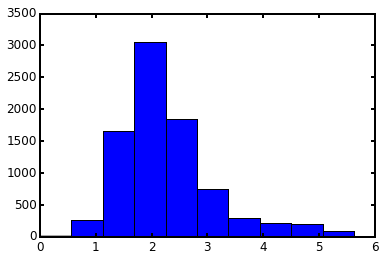

In [24]:
ok = np.isfinite(fpp_all['secthresh']) & (fpp_all['secthresh'] > 0)
plt.hist(np.log10(fpp_all[ok]['secthresh']))
print (fpp_all[ok]['secthresh'] < 100).sum()
print (fpp_all[ok]['secthresh'] < 50).sum()
print (fpp_all[ok]['secthresh'] < 30).sum()


11.06


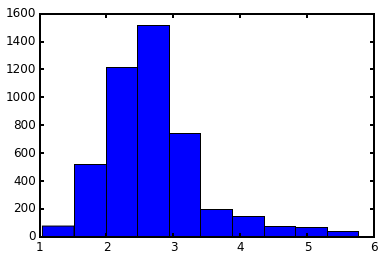

In [21]:
from keputils import koiutils as ku
ok = (ku.DATA['koi_depth'] > 10) & (ku.DATA['koi_disposition'] != 'FALSE POSITIVE')
print(ku.DATA[ok]['koi_depth'].min())
plt.hist(np.log10(ku.DATA[ok]['koi_depth']));

In [27]:
koilist = ['K00571.05', 'K01422.04', 'K01422.05', 'K02529.02', 'K03255.01', 
           'K03284.01', 'K04005.01', 'K04087.01', 'K04427.01', 'K04622.01', 
           'K04742.01', 'K04745.01']

fpp_all.ix[koilist, ['L_tot', 'prob_ontarget', 'FPP', 'exception']]

,L_tot,prob_ontarget,FPP,exception
koi,,,,
K00571.05,2.609,1.00,0.230000,NaN
K01422.04,3.560,1.00,0.000048,NaN
K01422.05,6.518,1.00,0.067100,NaN
K02529.02,NaN,1.00,NaN,BadRoweFitError
K03255.01,19.100,1.00,0.000077,NaN
K03284.01,9.026,0.86,0.014000,NaN
K04005.01,5.110,1.00,0.000038,NaN
K04087.01,0.516,1.00,0.000083,NaN
K04427.01,1.814,1.00,0.040800,NaN


In [21]:
import os.path
agol_list = os.path.expanduser('/u/tdm/Downloads/morton_list.txt')

agol_kics = np.loadtxt(agol_list,dtype=int)

In [25]:
agol_kois = []
for k in agol_kics:
    agol_kois.append(ku.DATA.kepoi_name.values[(ku.DATA.kepid==k).values])
agol_kois = np.concatenate(agol_kois)

In [26]:
agol_kois

array(['K05073.01', 'K01206.01', 'K00771.01', 'K01032.01', 'K00375.01',
       'K01463.01', 'K00682.01', 'K00371.01', 'K00371.02', 'K01431.01',
       'K01174.01', 'K01375.01', 'K01411.01', 'K05073.01', 'K05477.01',
       'K05550.01', 'K05241.01', 'K01268.01', 'K00868.01', 'K02679.01',
       'K01486.01', 'K01486.02', 'K02674.01', 'K02674.02', 'K02674.03',
       'K03783.01', 'K01772.01', 'K00865.01', 'K01466.01', 'K03726.01',
       'K03711.01', 'K00998.01', 'K01226.01', 'K01242.01', 'K01257.01',
       'K05711.01', 'K00366.01', 'K00686.01', 'K00398.01', 'K00398.02',
       'K00398.03'], dtype=object)

In [30]:
fpp_all.ix[agol_kois,['rprs','L_tot','FPP','period']].sort('FPP').to_csv('agol_kois.csv')

In [14]:
from keputils import koiutils as ku
for c in ku.DR24.columns:
    print c

kepid
kepoi_name
kepler_name
ra
ra_err
ra_str
dec
dec_err
dec_str
koi_gmag
koi_gmag_err
koi_rmag
koi_rmag_err
koi_imag
koi_imag_err
koi_zmag
koi_zmag_err
koi_jmag
koi_jmag_err
koi_hmag
koi_hmag_err
koi_kmag
koi_kmag_err
koi_kepmag
koi_kepmag_err
koi_delivname
koi_vet_stat
koi_quarters
koi_disposition
koi_pdisposition
koi_count
koi_num_transits
koi_max_sngle_ev
koi_max_mult_ev
koi_bin_oedp_sig
koi_limbdark_mod
koi_ldm_coeff4
koi_ldm_coeff3
koi_ldm_coeff2
koi_ldm_coeff1
koi_trans_mod
koi_model_snr
koi_model_dof
koi_model_chisq
koi_time0bk
koi_time0bk_err1
koi_time0bk_err2
koi_eccen
koi_eccen_err1
koi_eccen_err2
koi_longp
koi_longp_err1
koi_longp_err2
koi_prad
koi_prad_err1
koi_prad_err2
koi_sma
koi_sma_err1
koi_sma_err2
koi_impact
koi_impact_err1
koi_impact_err2
koi_duration
koi_duration_err1
koi_duration_err2
koi_ingress
koi_ingress_err1
koi_ingress_err2
koi_depth
koi_depth_err1
koi_depth_err2
koi_period
koi_period_err1
koi_period_err2
koi_ror
koi_ror_err1
koi_ror_err2
koi_dor
koi_dor_e

In [15]:
ku.DR24.koi_disp_prov.unique()

array(['q1_q17_dr24_koi'], dtype=object)

In [3]:
fpp_all.query('period < 2 and disposition!="FALSE POSITIVE"')['FPP'].describe()

count    3.600000e+02
mean     3.196709e-01
std      4.283248e-01
min      5.230000e-09
25%      6.087500e-04
50%      2.370000e-02
75%      9.115000e-01
max      1.000000e+00
Name: FPP, dtype: float64

In [8]:
from keputils import koiutils as ku
ok = (np.isfinite(ku.DR24.koi_srho_err1/ku.DR24.koi_srho_err2))
(ku.DR24[ok].koi_srho_err1/ku.DR24[ok].koi_srho_err2).describe()

count      7340.000000
mean       -138.611127
std        7414.865033
min     -611332.489796
25%          -2.832753
50%          -0.915064
75%          -0.374843
max          -0.000000
dtype: float64

In [10]:
ku.DR24[ok][['koi_srho_err1','koi_srho_err2']].describe()

,koi_srho_err1,koi_srho_err2
count,7340.000000,7340.000000
mean,5.463703,-4.662725
std,36.951777,36.640675
min,0.000000,-700.173580
25%,0.027958,-0.960600
50%,0.219325,-0.185740
75%,1.057405,-0.018755
max,647.177920,-0.000010


In [13]:
ku.DR24.query('koi_pdisposition=="FALSE POSITIVE"').koi_fpflag_nt.sum()

411

In [14]:
len(ku.DR24.query('koi_pdisposition=="FALSE POSITIVE"'))

3177

In [94]:
fpp_all.ix['K06705.01']

koi.1                    K06705.01
rprs                         0.034
secthresh                       30
maxrad                         3.6
pr_heb                    1.49e-16
pr_heb_Px2                  0.0105
pr_eb                     0.000354
pr_eb_Px2                 1.43e-06
pr_beb                       0.863
pr_beb_Px2                   0.126
L_tot                        1.263
fp                            0.17
FPP                              1
kepid                      6423922
period                   0.9951438
rp                         1.74255
disposition              CANDIDATE
prob_ontarget                    1
pos_prob_score                0.18
not_transitlike              False
significant_secondary        False
centroid_offset              False
ephem_match                  False
MES                       14.34296
exception                      NaN
has_ttv                      False
n_cands                          1
Name: K06705.01, dtype: object

In [3]:
fpwg = pd.read_csv('fpwg.csv', comment='#')

In [4]:
fpwg.index = fpwg.kepoi_name

In [6]:
pems = fpwg.query('fpwg_disp_perep==1').kepoi_name

(187, 75, 15)
(15, 3)


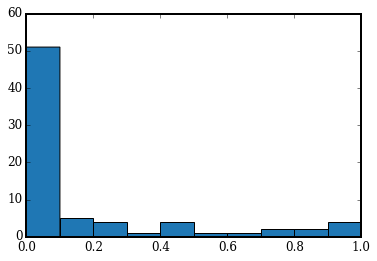

In [141]:
import matplotlib.pyplot as plt

pem = fpp_all.ephem_match & ~(fpp_all.not_transitlike | fpp_all.centroid_offset | 
                                 fpp_all.significant_secondary)
score_ok = fpp_all.pos_prob_score > 0.3
pos_ok = fpp_all.prob_ontarget > 0.99
mes_ok = fpp_all.MES > 10
lo_fpp = fpp_all.FPP < 0.01
plt.hist(fpp_all[pem & pos_ok & mes_ok].pos_prob_score)
print(sum(pem),sum(pem & pos_ok & mes_ok), sum(pem & pos_ok & score_ok & mes_ok))
print(sum(pem & pos_ok & score_ok & mes_ok), sum(pem & pos_ok & score_ok & mes_ok & lo_fpp))

In [147]:
3./980 * (0.35 - 0.13)

0.0006734693877551019

In [125]:
sum(pem & (fpp_all.prob_ontarget==0))

325

In [146]:
980./len(fpp_all)

0.13119143239625167

In [140]:
q = 'pos_prob_score > 0.3 and prob_ontarget > 0.99 and ephem_match==1 and FPP < 0.01 and MES > 10'
q2 = 'ephem_match==1'
print len(fpp_all.query(q))
print len(fpp_all.query(q2))
fpp_all.query(q)[['FPP','pos_prob_score','period']]

7
980


,FPP,pos_prob_score,period
koi,,,
K04658.01,6.604000e-05,0.78,1.878914
K05252.01,2.198000e-04,0.44,1.804548
K05260.01,1.251800e-04,0.67,1.559361
K05270.02,2.385000e-05,0.33,0.907818
K06613.01,6.991500e-04,0.42,4.182300
K06732.01,3.110000e-07,0.42,0.733726
K06887.01,1.940000e-03,0.33,0.622289
